## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Upload Data Base

In [2]:
df_ord = pd.read_csv(r'base_orders.csv')

In [3]:
df_ord.shape

(1066717, 14)

In [4]:
df_ord.columns

Index(['ORD_ORDER_ID', 'CUS_CUST_ID_SEL', 'ITE_ITEM_ID', 'CTLG_PROD_ID',
       'ITE_BASE_CURRENT_PRICE', 'active_item', 'flag_bad_item',
       'flag_bad_user', 'order_trusted', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final'],
      dtype='object')

In [5]:
df_ord.head()

,ORD_ORDER_ID,CUS_CUST_ID_SEL,ITE_ITEM_ID,CTLG_PROD_ID,ITE_BASE_CURRENT_PRICE,active_item,flag_bad_item,flag_bad_user,order_trusted,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final
0,4654788990,131356719,1904336408,6240112,518.25,0,0,0,0,0,1,1,1.0,0.0
1,4653151316,53919165,1367749223,11754915,22.24,1,0,0,1,0,0,0,0.0,0.0
2,4620214232,414872503,1689031432,15984003,52.99,0,0,0,1,1,0,0,0.0,0.0
3,4618321782,480263032,1658897376,14214635,35.11,0,0,0,1,1,0,0,0.0,0.0
4,4675812638,451835672,1743613950,15786116,25.04,0,0,0,1,1,0,0,0.0,0.0


In [6]:
df_ord.dtypes

ORD_ORDER_ID                int64
CUS_CUST_ID_SEL             int64
ITE_ITEM_ID                 int64
CTLG_PROD_ID                int64
ITE_BASE_CURRENT_PRICE    float64
active_item                 int64
flag_bad_item               int64
flag_bad_user               int64
order_trusted               int64
is_buybox                   int64
has_bpp                     int64
has_claim_seller            int64
is_refund                 float64
bpp_cashout_final         float64
dtype: object

## Describe of the prices of the products

In [7]:
df_prod = df_ord[['CTLG_PROD_ID','ITE_ITEM_ID','ITE_BASE_CURRENT_PRICE']]

In [8]:
df_prod.sample(5)

,CTLG_PROD_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE
337620,15949974,1738234099,197.84
940730,8755483,1895674437,489.08
801907,15534261,1895343905,58.57
494103,14287795,1690041968,7.60
938998,8980299,1789164694,21.09


In [9]:
df_prod.shape

(1066717, 3)

In [10]:
gb=df_prod.groupby(['CTLG_PROD_ID'])
df_des=gb['ITE_BASE_CURRENT_PRICE'].describe()
df_des

,count,mean,std,min,25%,50%,75%,max
CTLG_PROD_ID,,,,,,,,
633,5.0,41.338000,4.864187,37.50,37.50,38.86,44.480,48.35
5020,21.0,44.738571,3.796100,41.91,41.91,44.90,45.380,59.86
802407,1.0,43.340000,NaN,43.34,43.34,43.34,43.340,43.34
802447,3.0,18.766667,7.990528,9.54,16.46,23.38,23.380,23.38
802465,75.0,98.923867,63.653281,5.72,7.60,137.79,140.415,181.60
...,...,...,...,...,...,...,...,...
18326224,1.0,79.990000,NaN,79.99,79.99,79.99,79.990,79.99
18337312,1.0,705.030000,NaN,705.03,705.03,705.03,705.030,705.03
18339643,4.0,181.730000,9.560000,167.39,181.73,186.51,186.510,186.51


## Drop rows with NaN std

In [11]:
countNaN = df_des['std'].isna().sum()
countNaN

1965

In [12]:
df_des.dropna(subset = ['std'], inplace=True)

In [13]:
countNaN = df_des['std'].isna().sum()
countNaN

0

## Reset the index

In [14]:
df_des=df_des.reset_index()

In [15]:
df_des.head()

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max
0,633,5.0,41.338000,4.864187,37.50,37.50,38.86,44.480,48.35
1,5020,21.0,44.738571,3.796100,41.91,41.91,44.90,45.380,59.86
2,802447,3.0,18.766667,7.990528,9.54,16.46,23.38,23.380,23.38
3,802465,75.0,98.923867,63.653281,5.72,7.60,137.79,140.415,181.60
4,802499,3.0,47.350000,0.571577,47.02,47.02,47.02,47.515,48.01


In [16]:
df_des.shape

(11913, 9)

## Join the DFs by Product ID

In [17]:
df = pd.merge(left = df_des, right = df_ord,
                how = 'inner',
                left_on='CTLG_PROD_ID', right_on='CTLG_PROD_ID')

In [18]:
df.shape

(1064752, 22)

In [19]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'CUS_CUST_ID_SEL', 'ITE_ITEM_ID',
       'ITE_BASE_CURRENT_PRICE', 'active_item', 'flag_bad_item',
       'flag_bad_user', 'order_trusted', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final'],
      dtype='object')

In [20]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,...,ITE_BASE_CURRENT_PRICE,active_item,flag_bad_item,flag_bad_user,order_trusted,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final
873494,16163951,801.0,370.713134,39.681906,328.10,351.32,358.38,371.35,582.91,4610373621,...,379.64,0,0,0,1,1,0,0,0.0,0.0
365521,14605138,675.0,28.390726,1.375589,24.20,27.32,27.62,29.28,34.29,4629487955,...,27.32,0,0,0,1,1,0,0,0.0,0.0
694799,15841984,1010.0,238.102238,4.096216,220.30,238.06,238.06,238.06,293.91,4613298744,...,238.06,1,0,0,1,1,0,0,0.0,0.0
565798,15534263,1152.0,62.042743,32.516582,48.60,54.55,55.46,58.23,248.61,4649788377,...,64.43,0,0,0,1,1,1,1,1.0,0.0
196001,8859567,1027.0,6.163934,3.136324,2.32,5.72,6.27,6.76,58.04,4671350737,...,6.27,1,0,0,1,0,0,0,0.0,0.0


## Bad orders

In [21]:
df['bad_order'] = df.apply(lambda x: 1 if x['flag_bad_user'] == 1 or x['has_bpp'] == 1 or x['has_claim_seller'] == 1 or x['is_refund'] == 1 or x['bpp_cashout_final'] > 0 else 0, axis=1)


In [22]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,...,active_item,flag_bad_item,flag_bad_user,order_trusted,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,bad_order
54087,6141038,35.0,30.420571,11.753877,12.55,12.55,39.06,39.06,39.06,4669474795,...,1,0,0,1,1,0,0,0.0,0.0,0
1019418,17459958,2122.0,336.367399,207.539770,278.32,323.08,329.19,340.22,9870.00,4675996560,...,0,0,0,1,1,0,0,0.0,0.0,0
125116,6370536,71.0,148.946197,73.994090,9.10,108.50,120.43,239.22,253.44,4676836456,...,1,0,0,1,0,0,0,0.0,0.0,0
286078,11665477,105.0,83.277524,1.538951,74.31,83.84,83.84,83.84,83.84,4670521605,...,1,0,0,1,1,0,0,0.0,0.0,0
1047459,17796173,1277.0,56.721237,17.287136,1.39,53.35,55.27,58.38,638.51,4680476946,...,1,0,0,1,0,0,0,0.0,0.0,0


In [23]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'CUS_CUST_ID_SEL', 'ITE_ITEM_ID',
       'ITE_BASE_CURRENT_PRICE', 'active_item', 'flag_bad_item',
       'flag_bad_user', 'order_trusted', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final', 'bad_order'],
      dtype='object')

# Base on the Price_Range

## Create columns flag low_price for those items with price below the 25%

In [24]:
df['Low25_Price'] = df.apply(lambda x: 1 if x['25%'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create columns flag middle_price for items with price below the 75% and over the  25%

In [25]:
df['Middle_Price'] = df.apply(lambda x: 1 if x['75%'] >= x['ITE_BASE_CURRENT_PRICE'] and x['25%'] <= x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)


## Create column flag high_price for those items with price over the 75%

In [26]:
df['High75_Price'] = df.apply(lambda x: 1 if x['75%'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag price_range

In [27]:
df['Price_Range'] = df.apply(lambda x:'low_25' if x['Low25_Price']== 1 else('high_75' if  x['High75_Price']==1  else 'middle'),axis=1)


In [28]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'CUS_CUST_ID_SEL', 'ITE_ITEM_ID',
       'ITE_BASE_CURRENT_PRICE', 'active_item', 'flag_bad_item',
       'flag_bad_user', 'order_trusted', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final', 'bad_order',
       'Low25_Price', 'Middle_Price', 'High75_Price', 'Price_Range'],
      dtype='object')

In [29]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,...,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,bad_order,Low25_Price,Middle_Price,High75_Price,Price_Range
357758,14540829,589.0,50.097080,16.982425,39.06,44.9000,51.40,51.40,239.88,4648788020,...,0,0,0,0.0,0.0,0,0,1,0,middle
57621,6156495,22.0,110.760000,1.643005,108.89,109.4475,111.12,111.12,116.57,4628309845,...,1,0,0,0.0,0.0,0,0,1,0,middle
807933,16051104,214.0,10.418411,0.447024,9.75,10.3500,10.35,10.35,12.70,4679931765,...,0,0,0,0.0,0.0,0,0,0,1,high_75
491144,15285466,14488.0,20.067006,2.234364,13.72,19.2100,19.21,21.35,194.41,4630602669,...,1,0,0,0.0,0.0,0,1,0,0,low_25
91805,6304594,841.0,4.128478,0.603908,2.29,4.2300,4.23,4.23,9.76,4677986150,...,1,0,1,0.0,0.0,1,1,0,0,low_25


## Distribution Bad Orders

In [30]:
df_1=df[['Price_Range','bad_order','ORD_ORDER_ID']]

In [31]:
gb1=df_1.groupby(['Price_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,144950,169616,85.5
1,high_75,1,24666,169616,14.5
2,low_25,0,122872,148995,82.5
3,low_25,1,26123,148995,17.5
4,middle,0,653552,746141,87.6
5,middle,1,92589,746141,12.4


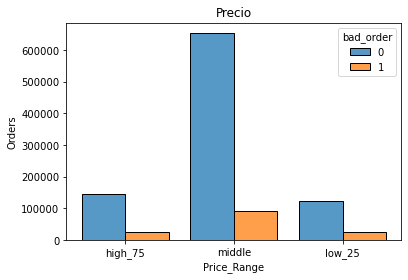

In [32]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="bad_order",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Bad Users

In [33]:
df_1=df[['Price_Range','flag_bad_user','ORD_ORDER_ID']]

In [34]:
gb1=df_1.groupby(['Price_Range','flag_bad_user']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,flag_bad_user,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,163154,169616,96.2
1,high_75,1,6462,169616,3.8
2,low_25,0,142571,148995,95.7
3,low_25,1,6424,148995,4.3
4,middle,0,723664,746141,97.0
5,middle,1,22477,746141,3.0


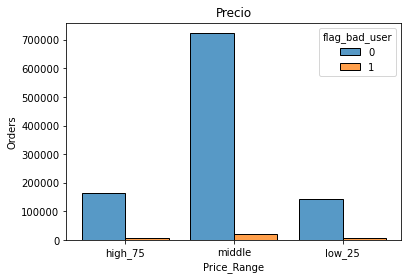

In [35]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="flag_bad_user",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has CashOut

In [36]:
df_1=df[['Price_Range','bpp_cashout_final','ORD_ORDER_ID']]
df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)
df_1=df_1[['Price_Range','has_co','ORD_ORDER_ID']]

<ipython-input-36-239d2c268fe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)


In [37]:
gb1=df_1.groupby(['Price_Range','has_co']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,has_co,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,168674,169616,99.4
1,high_75,1,942,169616,0.6
2,low_25,0,147812,148995,99.2
3,low_25,1,1183,148995,0.8
4,middle,0,742098,746141,99.5
5,middle,1,4043,746141,0.5


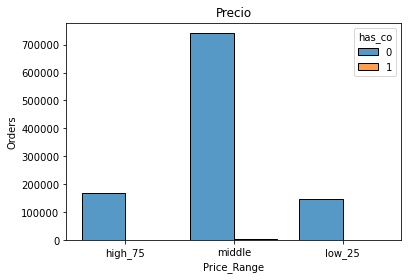

In [38]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="has_co",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has Claim

In [39]:
df_1=df[['Price_Range','has_claim_seller','ORD_ORDER_ID']]

In [40]:
gb1=df_1.groupby(['Price_Range','has_claim_seller']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,has_claim_seller,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,153804,169616,90.7
1,high_75,1,15812,169616,9.3
2,low_25,0,132141,148995,88.7
3,low_25,1,16854,148995,11.3
4,middle,0,685001,746141,91.8
5,middle,1,61140,746141,8.2


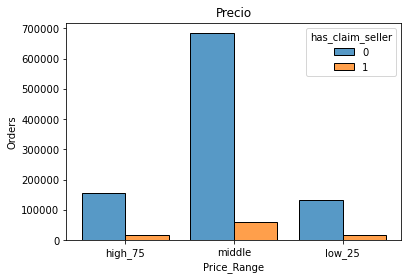

In [41]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="has_claim_seller",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution is Refund

In [42]:
df_1=df[['Price_Range','is_refund','ORD_ORDER_ID']]

In [43]:
gb1=df_1.groupby(['Price_Range','is_refund']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,is_refund,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0.0,153937,169612,90.8
1,high_75,1.0,15675,169612,9.2
2,low_25,0.0,131484,148987,88.3
3,low_25,1.0,17503,148987,11.7
4,middle,0.0,688331,746136,92.3
5,middle,1.0,57805,746136,7.7


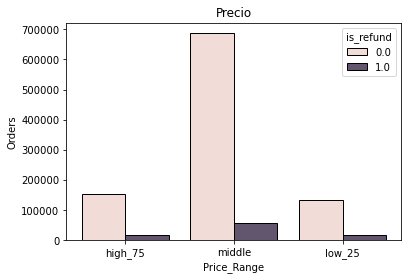

In [44]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="is_refund",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

# Base on the STD_Range

## Create DF STD

In [45]:
df_std = df_des[['CTLG_PROD_ID','mean']]
df_std['STDx1'] = df_des['std']
df_std['STDx1.25'] = df_des['std']*1.25
df_std['STDx1.5'] = df_des['std']*1.5
df_std['STDx1.75'] = df_des['std']*1.75
df_std['STDx2'] = df_des['std']*2
df_std['STDx2.25'] = df_des['std']*2.25
df_std['STDx2.5'] = df_des['std']*2.5
df_std['STDx2.75'] = df_des['std']*2.75
df_std['STDx3'] = df_des['std']*3
df_std=df_std.round(decimals=2)

<ipython-input-45-01a83c4a6b8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['STDx1'] = df_des['std']
<ipython-input-45-01a83c4a6b8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['STDx1.25'] = df_des['std']*1.25
<ipython-input-45-01a83c4a6b8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [46]:
df_std.sample(5)

,CTLG_PROD_ID,mean,STDx1,STDx1.25,STDx1.5,STDx1.75,STDx2,STDx2.25,STDx2.5,STDx2.75,STDx3
566,6121295,33.51,1.54,1.93,2.31,2.70,3.08,3.47,3.86,4.24,4.63
2775,9299258,502.40,27.02,33.78,40.53,47.29,54.04,60.80,67.55,74.31,81.06
6189,15188560,335.79,22.27,27.83,33.40,38.97,44.53,50.10,55.67,61.23,66.80
6349,15234048,717.13,10.50,13.12,15.74,18.37,20.99,23.62,26.24,28.87,31.49
11101,16933598,173.17,7.44,9.30,11.16,13.02,14.88,16.74,18.60,20.46,22.32


In [47]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'CUS_CUST_ID_SEL', 'ITE_ITEM_ID',
       'ITE_BASE_CURRENT_PRICE', 'active_item', 'flag_bad_item',
       'flag_bad_user', 'order_trusted', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final', 'bad_order',
       'Low25_Price', 'Middle_Price', 'High75_Price', 'Price_Range'],
      dtype='object')

In [48]:
df.head(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,...,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,bad_order,Low25_Price,Middle_Price,High75_Price,Price_Range
0,633,5.0,41.338,4.864187,37.5,37.5,38.86,44.48,48.35,4657437874,...,0,1,1,1.0,0.0,1,0,0,1,high_75
1,633,5.0,41.338,4.864187,37.5,37.5,38.86,44.48,48.35,4663135807,...,0,0,0,0.0,0.0,0,0,1,0,middle
2,633,5.0,41.338,4.864187,37.5,37.5,38.86,44.48,48.35,4613961317,...,1,0,0,0.0,0.0,0,0,1,0,middle
3,633,5.0,41.338,4.864187,37.5,37.5,38.86,44.48,48.35,4623483089,...,1,1,0,1.0,0.0,1,0,1,0,middle
4,633,5.0,41.338,4.864187,37.5,37.5,38.86,44.48,48.35,4672212277,...,0,0,0,0.0,0.0,0,0,1,0,middle


## Join the DF STD with the rest of the info

In [49]:
df_red = df.drop(columns=['count','mean','std','min','25%','50%','75%','max','Low25_Price','Middle_Price','High75_Price','Price_Range'])

df_s = pd.merge(left = df_red, right = df_std,
                how = 'inner',
                left_on='CTLG_PROD_ID', right_on='CTLG_PROD_ID')

In [50]:
df_s.sample(5)

,CTLG_PROD_ID,ORD_ORDER_ID,CUS_CUST_ID_SEL,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,active_item,flag_bad_item,flag_bad_user,order_trusted,is_buybox,...,mean,STDx1,STDx1.25,STDx1.5,STDx1.75,STDx2,STDx2.25,STDx2.5,STDx2.75,STDx3
868103,16157795,4621789919,130090710,1744844288,75.86,1,0,0,1,1,...,80.66,2.42,3.02,3.62,4.23,4.83,5.43,6.04,6.64,7.25
483383,15285466,4676758414,63258297,1855310543,23.18,0,0,0,1,1,...,20.07,2.23,2.79,3.35,3.91,4.47,5.03,5.59,6.14,6.70
775760,15984003,4670977913,414872503,1689031432,52.99,0,0,0,1,1,...,58.16,15.25,19.06,22.87,26.68,30.50,34.31,38.12,41.93,45.75
16276,6064933,4619742530,231800351,1835096080,11.93,0,0,0,1,1,...,14.22,2.69,3.36,4.04,4.71,5.38,6.05,6.73,7.40,8.07
1047403,17796173,4661088875,38397328,1870225169,60.73,1,0,0,0,0,...,56.72,17.29,21.61,25.93,30.25,34.57,38.90,43.22,47.54,51.86


In [51]:
df_s.columns

Index(['CTLG_PROD_ID', 'ORD_ORDER_ID', 'CUS_CUST_ID_SEL', 'ITE_ITEM_ID',
       'ITE_BASE_CURRENT_PRICE', 'active_item', 'flag_bad_item',
       'flag_bad_user', 'order_trusted', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final', 'bad_order',
       'mean', 'STDx1', 'STDx1.25', 'STDx1.5', 'STDx1.75', 'STDx2', 'STDx2.25',
       'STDx2.5', 'STDx2.75', 'STDx3'],
      dtype='object')

## Create column flag below STD

In [52]:
df_s['media-1std'] = df_s['mean'] - df_s['STDx1']
df_s['media-1.25std'] = df_s['mean'] - df_s['STDx1.25']
df_s['media-1.5std'] = df_s['mean'] - df_s['STDx1.5']
df_s['media-1.75std'] = df_s['mean'] - df_s['STDx1.75']
df_s['media-2std'] = df_s['mean'] - df_s['STDx2']
df_s['media-2.25std'] = df_s['mean'] - df_s['STDx2.25']
df_s['media-2.5std'] = df_s['mean'] - df_s['STDx2.5']
df_s['media-2.75std'] = df_s['mean'] - df_s['STDx2.75']
df_s['media-3std'] = df_s['mean'] - df_s['STDx3']

In [53]:
df_s['Low_1STD'] = df_s.apply(lambda x: 1 if x['media-1std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.25STD'] = df_s.apply(lambda x: 1 if x['media-1.25std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.5STD'] = df_s.apply(lambda x: 1 if x['media-1.5std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.75STD'] = df_s.apply(lambda x: 1 if x['media-1.75std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2STD'] = df_s.apply(lambda x: 1 if x['media-2std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.25STD'] = df_s.apply(lambda x: 1 if x['media-2.25std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.5STD'] = df_s.apply(lambda x: 1 if x['media-2.5std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.75STD'] = df_s.apply(lambda x: 1 if x['media-2.75std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_3STD'] = df_s.apply(lambda x: 1 if x['media-3std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag over STD

In [54]:
df_s['media+1std'] = df_s['mean'] + df_s['STDx1']
df_s['media+1.25std'] = df_s['mean'] + df_s['STDx1.25']
df_s['media+1.5std'] = df_s['mean'] + df_s['STDx1.5']
df_s['media+1.75std'] = df_s['mean'] + df_s['STDx1.75']
df_s['media+2std'] = df_s['mean'] + df_s['STDx2']
df_s['media+2.25std'] = df_s['mean'] + df_s['STDx2.25']
df_s['media+2.5std'] = df_s['mean'] + df_s['STDx2.5']
df_s['media+2.75std'] = df_s['mean'] + df_s['STDx2.75']
df_s['media+3std'] = df_s['mean'] + df_s['STDx3']

In [55]:
df_s['High_1STD'] = df_s.apply(lambda x: 1 if x['media+1std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.25STD'] = df_s.apply(lambda x: 1 if x['media+1.25std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.5STD'] = df_s.apply(lambda x: 1 if x['media+1.5std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.75STD'] = df_s.apply(lambda x: 1 if x['media+1.75std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2STD'] = df_s.apply(lambda x: 1 if x['media+2std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.25STD'] = df_s.apply(lambda x: 1 if x['media+2.25std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.5STD'] = df_s.apply(lambda x: 1 if x['media+2.5std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.75STD'] = df_s.apply(lambda x: 1 if x['media+2.75std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_3STD'] = df_s.apply(lambda x: 1 if x['media+3std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag STD_range

In [56]:
df_s['1STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1STD']== 1 else('high_STD' if  x['High_1STD']==1  else 'middle_STD'),axis=1)
df_s['1.25STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.25STD']== 1 else('high_STD' if  x['High_1.25STD']==1  else 'middle_STD'),axis=1)
df_s['1.5STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.5STD']== 1 else('high_STD' if  x['High_1.5STD']==1  else 'middle_STD'),axis=1)
df_s['1.75STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.75STD']== 1 else('high_STD' if  x['High_1.75STD']==1  else 'middle_STD'),axis=1)
df_s['2STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2STD']== 1 else('high_STD' if  x['High_2STD']==1  else 'middle_STD'),axis=1)
df_s['2.25STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.25STD']== 1 else('high_STD' if  x['High_2.25STD']==1  else 'middle_STD'),axis=1)
df_s['2.5STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.5STD']== 1 else('high_STD' if  x['High_2.5STD']==1  else 'middle_STD'),axis=1)
df_s['2.75STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.75STD']== 1 else('high_STD' if  x['High_2.75STD']==1  else 'middle_STD'),axis=1)
df_s['3STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_3STD']== 1 else('high_STD' if  x['High_3STD']==1  else 'middle_STD'),axis=1)


In [57]:
df_s.columns

Index(['CTLG_PROD_ID', 'ORD_ORDER_ID', 'CUS_CUST_ID_SEL', 'ITE_ITEM_ID',
       'ITE_BASE_CURRENT_PRICE', 'active_item', 'flag_bad_item',
       'flag_bad_user', 'order_trusted', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final', 'bad_order',
       'mean', 'STDx1', 'STDx1.25', 'STDx1.5', 'STDx1.75', 'STDx2', 'STDx2.25',
       'STDx2.5', 'STDx2.75', 'STDx3', 'media-1std', 'media-1.25std',
       'media-1.5std', 'media-1.75std', 'media-2std', 'media-2.25std',
       'media-2.5std', 'media-2.75std', 'media-3std', 'Low_1STD',
       'Low_1.25STD', 'Low_1.5STD', 'Low_1.75STD', 'Low_2STD', 'Low_2.25STD',
       'Low_2.5STD', 'Low_2.75STD', 'Low_3STD', 'media+1std', 'media+1.25std',
       'media+1.5std', 'media+1.75std', 'media+2std', 'media+2.25std',
       'media+2.5std', 'media+2.75std', 'media+3std', 'High_1STD',
       'High_1.25STD', 'High_1.5STD', 'High_1.75STD', 'High_2STD',
       'High_2.25STD', 'High_2.5STD', 'High_2.75STD', 'High_3STD',
       

In [58]:
df_s.sample(5)

,CTLG_PROD_ID,ORD_ORDER_ID,CUS_CUST_ID_SEL,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,active_item,flag_bad_item,flag_bad_user,order_trusted,is_buybox,...,High_3STD,1STD_Range,1.25STD_Range,1.5STD_Range,1.75STD_Range,2STD_Range,2.25STD_Range,2.5STD_Range,2.75STD_Range,3STD_Range
1051789,17823392,4670022987,418149407,1832342815,83.48,1,0,0,1,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
200878,8923630,4648011457,116155669,1471283996,87.49,1,0,0,1,0,...,1,high_STD,high_STD,high_STD,high_STD,high_STD,high_STD,high_STD,high_STD,high_STD
11160,6062308,4609933737,308986917,1850098857,10.50,0,0,1,1,1,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
305547,13300825,4672252609,566826182,1870038579,26.68,1,0,0,1,0,...,0,low_STD,low_STD,low_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
786646,16002633,4618812315,267892530,1715461575,512.52,1,0,0,1,1,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD


In [59]:
df_2=df_s[['1STD_Range','1.25STD_Range','1.5STD_Range','1.75STD_Range','2STD_Range','2.25STD_Range','2.5STD_Range','2.75STD_Range','3STD_Range','bad_order','ORD_ORDER_ID']]
df_2.sample(5)

,1STD_Range,1.25STD_Range,1.5STD_Range,1.75STD_Range,2STD_Range,2.25STD_Range,2.5STD_Range,2.75STD_Range,3STD_Range,bad_order,ORD_ORDER_ID
64973,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4668406582
549954,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4656729673
368589,high_STD,high_STD,high_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4646386656
607163,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4625183021
349144,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,1,4635444555


## Distribution Bad Orders by different STD segments

In [60]:
df_1=df_s[['1STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1STD_Range','ORD_ORDER_ID']].groupby(['1STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1STD_Range','TOTAL']]

ds_1 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1STD_Range', right_on='1STD_Range')

ds_1['Dis.[%]']=(ds_1['ORD_ORDER_ID']/ds_1['TOTAL'])*100
ds_1['Dis.[%]']=ds_1['Dis.[%]'].round(decimals=1)

ds_1=ds_1[ds_1['bad_order']==1]
#ds_1=ds_1[ds_1['1STD_Range']=='low_STD']

In [61]:
df_1=df_s[['1.25STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.25STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.25STD_Range','ORD_ORDER_ID']].groupby(['1.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.25STD_Range','TOTAL']]

ds_125 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.25STD_Range', right_on='1.25STD_Range')

ds_125['Dis.[%]']=(ds_125['ORD_ORDER_ID']/ds_125['TOTAL'])*100
ds_125['Dis.[%]']=ds_125['Dis.[%]'].round(decimals=1)

ds_125=ds_125[ds_125['bad_order']==1]
#ds_125=ds_125[ds_125['1.25STD_Range']=='low_STD']

In [62]:
df_1=df_s[['1.5STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.5STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.5STD_Range','ORD_ORDER_ID']].groupby(['1.5STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.5STD_Range','TOTAL']]

ds_15 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.5STD_Range', right_on='1.5STD_Range')

ds_15['Dis.[%]']=(ds_15['ORD_ORDER_ID']/ds_15['TOTAL'])*100
ds_15['Dis.[%]']=ds_15['Dis.[%]'].round(decimals=1)

ds_15=ds_15[ds_15['bad_order']==1]
#ds_15=ds_15[ds_15['1.5STD_Range']=='low_STD']

In [63]:
df_1=df_s[['1.75STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.75STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.75STD_Range','ORD_ORDER_ID']].groupby(['1.75STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.75STD_Range','TOTAL']]

ds_175 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.75STD_Range', right_on='1.75STD_Range')

ds_175['Dis.[%]']=(ds_175['ORD_ORDER_ID']/ds_175['TOTAL'])*100
ds_175['Dis.[%]']=ds_175['Dis.[%]'].round(decimals=1)

ds_175=ds_175[ds_175['bad_order']==1]
#ds_175=ds_175[ds_175['1.75STD_Range']=='low_STD']

In [64]:
df_1=df_s[['2STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2STD_Range','ORD_ORDER_ID']].groupby(['2STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2STD_Range','TOTAL']]

ds_2 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2STD_Range', right_on='2STD_Range')

ds_2['Dis.[%]']=(ds_2['ORD_ORDER_ID']/ds_2['TOTAL'])*100
ds_2['Dis.[%]']=ds_2['Dis.[%]'].round(decimals=1)

ds_2=ds_2[ds_2['bad_order']==1]
#ds_2=ds_2[ds_2['2STD_Range']=='low_STD']

In [65]:
df_1=df_s[['2.25STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.25STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

ds_225 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

ds_225['Dis.[%]']=(ds_225['ORD_ORDER_ID']/ds_225['TOTAL'])*100
ds_225['Dis.[%]']=ds_225['Dis.[%]'].round(decimals=1)

ds_225=ds_225[ds_225['bad_order']==1]
#ds_225=ds_225[ds_225['2.25STD_Range']=='low_STD']

In [66]:
df_1=df_s[['2.5STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.5STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.5STD_Range','ORD_ORDER_ID']].groupby(['2.5STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.5STD_Range','TOTAL']]

ds_25 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.5STD_Range', right_on='2.5STD_Range')

ds_25['Dis.[%]']=(ds_25['ORD_ORDER_ID']/ds_25['TOTAL'])*100
ds_25['Dis.[%]']=ds_25['Dis.[%]'].round(decimals=1)

ds_25=ds_25[ds_25['bad_order']==1]
#ds_25=ds_25[ds_25['2.5STD_Range']=='low_STD']

In [67]:
df_1=df_s[['2.75STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.75STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.75STD_Range','ORD_ORDER_ID']].groupby(['2.75STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.75STD_Range','TOTAL']]

ds_275 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.75STD_Range', right_on='2.75STD_Range')

ds_275['Dis.[%]']=(ds_275['ORD_ORDER_ID']/ds_275['TOTAL'])*100
ds_275['Dis.[%]']=ds_275['Dis.[%]'].round(decimals=1)

ds_275=ds_275[ds_275['bad_order']==1]
#ds_275=ds_275[ds_275['2.75STD_Range']=='low_STD']

In [68]:
df_1=df_s[['3STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['3STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['3STD_Range','ORD_ORDER_ID']].groupby(['3STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['3STD_Range','TOTAL']]

ds_3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='3STD_Range', right_on='3STD_Range')

ds_3['Dis.[%]']=(ds_3['ORD_ORDER_ID']/ds_3['TOTAL'])*100
ds_3['Dis.[%]']=ds_3['Dis.[%]'].round(decimals=1)

ds_3=ds_3[ds_3['bad_order']==1]
#ds_3=ds_3[ds_3['3STD_Range']=='low_STD']

In [69]:
ds_1

,1STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,14109,100245,14.1
3,low_STD,1,13818,72615,19.0
5,middle_STD,1,115451,891892,12.9


In [70]:
ds_125

,1.25STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,10542,73895,14.3
3,low_STD,1,9071,42084,21.6
5,middle_STD,1,123765,948773,13.0


In [71]:
ds_15

,1.5STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,8013,55934,14.3
3,low_STD,1,5724,24145,23.7
5,middle_STD,1,129641,984673,13.2


In [72]:
ds_175

,1.75STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,6283,42112,14.9
3,low_STD,1,4035,15462,26.1
5,middle_STD,1,133060,1007178,13.2


In [73]:
ds_2

,2STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,4884,32135,15.2
3,low_STD,1,2949,9919,29.7
5,middle_STD,1,135545,1022698,13.3


In [74]:
ds_225

,2.25STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,3891,24364,16.0
3,low_STD,1,2321,6738,34.4
5,middle_STD,1,137166,1033650,13.3


In [75]:
ds_25

,2.5STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,3227,19386,16.6
3,low_STD,1,1897,5133,37.0
5,middle_STD,1,138254,1040233,13.3


In [76]:
ds_275

,2.75STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,2670,15163,17.6
3,low_STD,1,1593,4153,38.4
5,middle_STD,1,139115,1045436,13.3


In [77]:
ds_3

,3STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,2326,12421,18.7
3,low_STD,1,1348,3167,42.6
5,middle_STD,1,139704,1049164,13.3


## Distribution Bad Orders

In [78]:
df_1=df_s[['2.25STD_Range','bad_order','ORD_ORDER_ID']]

In [79]:
gb1=df_1.groupby(['2.25STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,20473,24364,84.0
1,high_STD,1,3891,24364,16.0
2,low_STD,0,4417,6738,65.6
3,low_STD,1,2321,6738,34.4
4,middle_STD,0,896484,1033650,86.7
5,middle_STD,1,137166,1033650,13.3


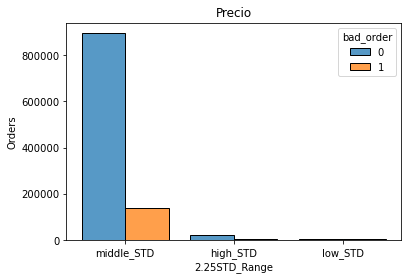

In [80]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="bad_order",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Bad Users

In [81]:
df_1=df_s[['2.25STD_Range','flag_bad_user','ORD_ORDER_ID']]

In [82]:
gb1=df_1.groupby(['2.25STD_Range','flag_bad_user']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,flag_bad_user,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,23410,24364,96.1
1,high_STD,1,954,24364,3.9
2,low_STD,0,6444,6738,95.6
3,low_STD,1,294,6738,4.4
4,middle_STD,0,999535,1033650,96.7
5,middle_STD,1,34115,1033650,3.3


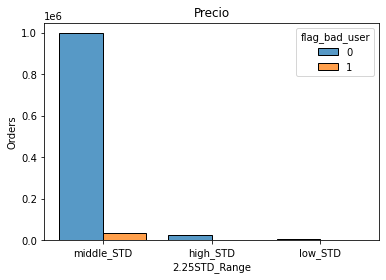

In [83]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="flag_bad_user",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has CashOut

In [84]:
df_1=df_s[['2.25STD_Range','bpp_cashout_final','ORD_ORDER_ID']]
df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)
df_1=df_1[['2.25STD_Range','has_co','ORD_ORDER_ID']]

<ipython-input-84-3a510db3b053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)


In [85]:
gb1=df_1.groupby(['2.25STD_Range','has_co']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,has_co,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,24180,24364,99.2
1,high_STD,1,184,24364,0.8
2,low_STD,0,6658,6738,98.8
3,low_STD,1,80,6738,1.2
4,middle_STD,0,1027746,1033650,99.4
5,middle_STD,1,5904,1033650,0.6


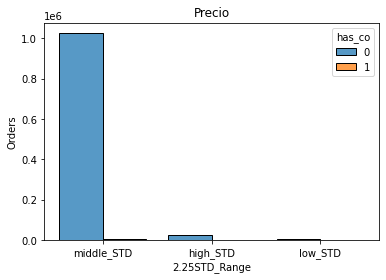

In [86]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="has_co",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has Claim

In [87]:
df_1=df_s[['2.25STD_Range','has_claim_seller','ORD_ORDER_ID']]

In [88]:
gb1=df_1.groupby(['2.25STD_Range','has_claim_seller']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,has_claim_seller,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,21839,24364,89.6
1,high_STD,1,2525,24364,10.4
2,low_STD,0,5063,6738,75.1
3,low_STD,1,1675,6738,24.9
4,middle_STD,0,944044,1033650,91.3
5,middle_STD,1,89606,1033650,8.7


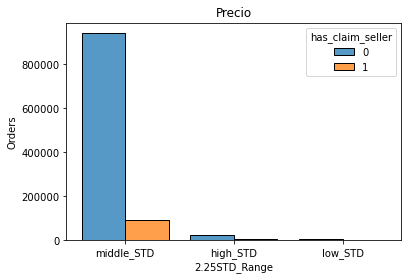

In [89]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="has_claim_seller",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution is Refund

In [90]:
df_1=df_s[['2.25STD_Range','is_refund','ORD_ORDER_ID']]

In [91]:
gb1=df_1.groupby(['2.25STD_Range','is_refund']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,is_refund,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0.0,21793,24364,89.4
1,high_STD,1.0,2571,24364,10.6
2,low_STD,0.0,4736,6735,70.3
3,low_STD,1.0,1999,6735,29.7
4,middle_STD,0.0,947223,1033636,91.6
5,middle_STD,1.0,86413,1033636,8.4


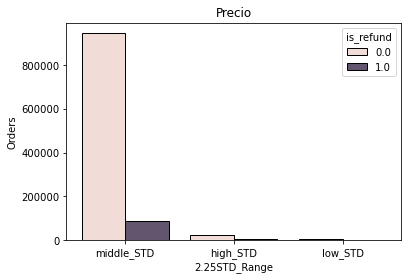

In [92]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="is_refund",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Active Items

In [93]:
df_1=df_s[['2.25STD_Range','active_item','ORD_ORDER_ID']]

In [94]:
gb1=df_1.groupby(['2.25STD_Range','active_item']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,active_item,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,12147,24364,49.9
1,high_STD,1,12217,24364,50.1
2,low_STD,0,5123,6738,76.0
3,low_STD,1,1615,6738,24.0
4,middle_STD,0,534862,1033650,51.7
5,middle_STD,1,498788,1033650,48.3


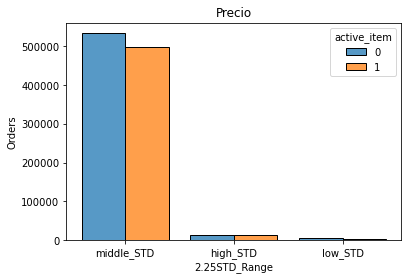

In [95]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="active_item",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Trusted Orders

In [96]:
df_1=df_s[['2.25STD_Range','order_trusted','ORD_ORDER_ID']]

In [97]:
gb1=df_1.groupby(['2.25STD_Range','order_trusted']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,order_trusted,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,604,24364,2.5
1,high_STD,1,23760,24364,97.5
2,low_STD,0,1785,6738,26.5
3,low_STD,1,4953,6738,73.5
4,middle_STD,0,18955,1033650,1.8
5,middle_STD,1,1014695,1033650,98.2


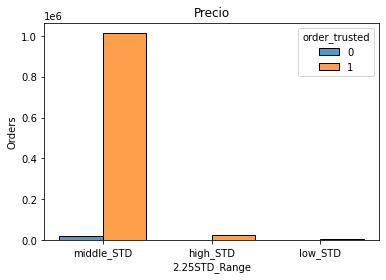

In [98]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="order_trusted",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Keep columns of interest

In [99]:
df_s.columns

Index(['CTLG_PROD_ID', 'ORD_ORDER_ID', 'CUS_CUST_ID_SEL', 'ITE_ITEM_ID',
       'ITE_BASE_CURRENT_PRICE', 'active_item', 'flag_bad_item',
       'flag_bad_user', 'order_trusted', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final', 'bad_order',
       'mean', 'STDx1', 'STDx1.25', 'STDx1.5', 'STDx1.75', 'STDx2', 'STDx2.25',
       'STDx2.5', 'STDx2.75', 'STDx3', 'media-1std', 'media-1.25std',
       'media-1.5std', 'media-1.75std', 'media-2std', 'media-2.25std',
       'media-2.5std', 'media-2.75std', 'media-3std', 'Low_1STD',
       'Low_1.25STD', 'Low_1.5STD', 'Low_1.75STD', 'Low_2STD', 'Low_2.25STD',
       'Low_2.5STD', 'Low_2.75STD', 'Low_3STD', 'media+1std', 'media+1.25std',
       'media+1.5std', 'media+1.75std', 'media+2std', 'media+2.25std',
       'media+2.5std', 'media+2.75std', 'media+3std', 'High_1STD',
       'High_1.25STD', 'High_1.5STD', 'High_1.75STD', 'High_2STD',
       'High_2.25STD', 'High_2.5STD', 'High_2.75STD', 'High_3STD',
       

In [100]:
df_f = df_s.drop(columns=['STDx1', 'STDx1.25', 'STDx1.5', 'STDx1.75', 'STDx2', 'STDx2.25',
       'STDx2.5', 'STDx2.75', 'STDx3', 'media-1std', 'media-1.25std',
       'media-1.5std', 'media-1.75std', 'media-2std', 'media-2.25std',
       'media-2.5std', 'media-2.75std', 'media-3std', 'Low_1STD',
       'Low_1.25STD', 'Low_1.5STD', 'Low_1.75STD', 'Low_2STD', 'Low_2.25STD',
       'Low_2.5STD', 'Low_2.75STD', 'Low_3STD', 'media+1std', 'media+1.25std',
       'media+1.5std', 'media+1.75std', 'media+2std', 'media+2.25std',
       'media+2.5std', 'media+2.75std', 'media+3std', 'High_1STD',
       'High_1.25STD', 'High_1.5STD', 'High_1.75STD', 'High_2STD',
       'High_2.25STD', 'High_2.5STD', 'High_2.75STD', 'High_3STD',
       '1STD_Range', '1.25STD_Range', '1.5STD_Range', '1.75STD_Range',
       '2STD_Range', '2.5STD_Range', '2.75STD_Range',
       '3STD_Range', 'ORD_ORDER_ID', 'order_trusted', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final', 'bad_order'])
                            

In [101]:
df_f.columns

Index(['CTLG_PROD_ID', 'CUS_CUST_ID_SEL', 'ITE_ITEM_ID',
       'ITE_BASE_CURRENT_PRICE', 'active_item', 'flag_bad_item',
       'flag_bad_user', 'mean', '2.25STD_Range'],
      dtype='object')

In [102]:
df_f.sample(5)

,CTLG_PROD_ID,CUS_CUST_ID_SEL,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,active_item,flag_bad_item,flag_bad_user,mean,2.25STD_Range
906118,16222632,468666100,1776953238,762.21,0,0,0,666.50,middle_STD
615738,15703578,237587727,1578176901,19.84,1,0,0,16.72,high_STD
36109,6085394,532562854,1914743304,66.82,0,0,0,69.28,middle_STD
938518,16589778,707758915,1836344046,51.44,0,1,0,57.27,middle_STD
1045417,17780161,526170740,1861930223,354.33,0,0,0,389.72,middle_STD


## Delate Duplicate Items

In [103]:
df_f.shape

(1064752, 9)

In [104]:
df_f = df_f.drop_duplicates(subset=['ITE_ITEM_ID'])

In [105]:
df_f.shape

(113858, 9)

In [126]:
aaa=df_f[df_f['flag_bad_item']==1]

In [129]:
aaa.sample(5)

,CTLG_PROD_ID,CUS_CUST_ID_SEL,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,active_item,flag_bad_item,flag_bad_user,mean,2.25STD_Range
825875,16085225,260243872,1919271558,285.81,0,1,0,568.40,middle_STD
613168,15701846,84714523,1860302228,32.19,0,1,0,49.56,low_STD
628944,15741060,477445382,1378967152,2.37,0,1,1,2.49,middle_STD
154495,7910150,500859485,1921222286,258.24,0,1,0,436.88,low_STD
292900,12104148,783913659,1933938265,39.98,0,1,0,40.86,middle_STD


## Active Items

In [130]:
df_1=df_f[['2.25STD_Range','active_item','ITE_ITEM_ID']]

In [131]:
gb1=df_1.groupby(['2.25STD_Range','active_item']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ITE_ITEM_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ITE_ITEM_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ITE_ITEM_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,active_item,ITE_ITEM_ID,TOTAL,Dis.[%]
0,high_STD,0,3459,7435,46.5
1,high_STD,1,3976,7435,53.5
2,low_STD,0,2372,2873,82.6
3,low_STD,1,501,2873,17.4
4,middle_STD,0,63787,103550,61.6
5,middle_STD,1,39763,103550,38.4


## Blocked Items

In [132]:
df_1=df_f[['2.25STD_Range','flag_bad_item','ITE_ITEM_ID']]

In [133]:
gb1=df_1.groupby(['2.25STD_Range','flag_bad_item']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ITE_ITEM_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ITE_ITEM_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ITE_ITEM_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,flag_bad_item,ITE_ITEM_ID,TOTAL,Dis.[%]
0,high_STD,0,7121,7435,95.8
1,high_STD,1,314,7435,4.2
2,low_STD,0,2160,2873,75.2
3,low_STD,1,713,2873,24.8
4,middle_STD,0,96643,103550,93.3
5,middle_STD,1,6907,103550,6.7


## DFs with low_STD

In [134]:
ord_tot = df_s.drop(columns=['STDx1', 'STDx1.25', 'STDx1.5', 'STDx1.75', 'STDx2', 'STDx2.25',
       'STDx2.5', 'STDx2.75', 'STDx3', 'media-1std', 'media-1.25std',
       'media-1.5std', 'media-1.75std', 'media-2std', 'media-2.25std',
       'media-2.5std', 'media-2.75std', 'media-3std', 'Low_1STD',
       'Low_1.25STD', 'Low_1.5STD', 'Low_1.75STD', 'Low_2STD', 'Low_2.25STD',
       'Low_2.5STD', 'Low_2.75STD', 'Low_3STD', 'media+1std', 'media+1.25std',
       'media+1.5std', 'media+1.75std', 'media+2std', 'media+2.25std',
       'media+2.5std', 'media+2.75std', 'media+3std', 'High_1STD',
       'High_1.25STD', 'High_1.5STD', 'High_1.75STD', 'High_2STD',
       'High_2.25STD', 'High_2.5STD', 'High_2.75STD', 'High_3STD',
       '1STD_Range', '1.25STD_Range', '1.5STD_Range', '1.75STD_Range',
       '2STD_Range', '2.5STD_Range', '2.75STD_Range',
       '3STD_Range'])

In [135]:
ord_low = ord_tot[ord_tot['2.25STD_Range']=='low_STD']

In [136]:
ord_low.shape

(6738, 17)

In [137]:
ite_low = df_f[df_f['2.25STD_Range']=='low_STD']

In [138]:
ite_low.shape

(2873, 9)

In [199]:
df_c = ord_tot.drop_duplicates(subset=['CUS_CUST_ID_SEL'])

In [200]:
cus_low = df_c[df_c['2.25STD_Range']=='low_STD']

In [202]:
cus_low.shape

(1196, 17)

## Orders Graphics

In [139]:
df_1=ord_low[['order_trusted','ORD_ORDER_ID']]

In [140]:
gb1=df_1.groupby(['order_trusted']).count()
gb1=gb1.reset_index()

gb2=gb1[['ORD_ORDER_ID']].sum()
gb1['TOTAL']=gb2['ORD_ORDER_ID']

gb1['Dis.[%]']=(gb1['ORD_ORDER_ID']/gb1['TOTAL'])*100
gb1['Dis.[%]']=gb1['Dis.[%]'].round(decimals=1)

gb1

,order_trusted,ORD_ORDER_ID,TOTAL,Dis.[%]
0,0,1785,6738,26.5
1,1,4953,6738,73.5


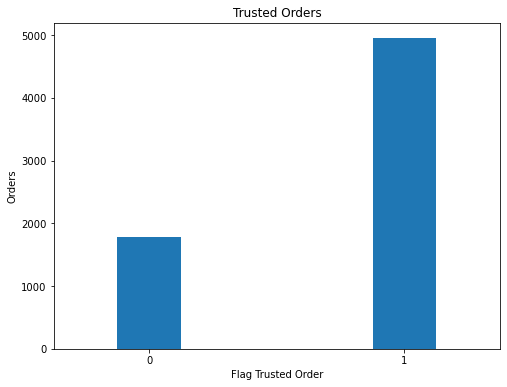

In [178]:
graa=gb1[['order_trusted','ORD_ORDER_ID']]
graf=graa.set_index('order_trusted')

graf.plot(kind='bar', figsize=(8, 6), rot=90, width= 0.25, legend=False)

plt.title('Trusted Orders')
plt.ylabel('Orders')
plt.xlabel('Flag Trusted Order')
plt.xticks(rotation=0)

plt.show()

In [182]:
df_1=ord_low[['bad_order','ORD_ORDER_ID']]

In [183]:
gb1=df_1.groupby(['bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['ORD_ORDER_ID']].sum()
gb1['TOTAL']=gb2['ORD_ORDER_ID']

gb1['Dis.[%]']=(gb1['ORD_ORDER_ID']/gb1['TOTAL'])*100
gb1['Dis.[%]']=gb1['Dis.[%]'].round(decimals=1)

gb1

,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
0,0,4417,6738,65.6
1,1,2321,6738,34.4


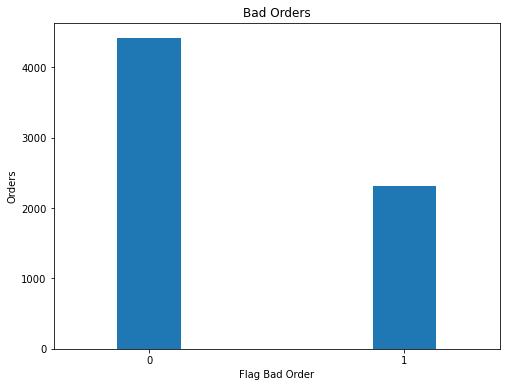

In [185]:
graa=gb1[['bad_order','ORD_ORDER_ID']]
graf=graa.set_index('bad_order')

graf.plot(kind='bar', figsize=(8, 6), rot=90, width= 0.25, legend=False)

plt.title('Bad Orders')
plt.ylabel('Orders')
plt.xlabel('Flag Bad Order')
plt.xticks(rotation=0)

plt.show()

In [258]:
df_1=ord_low[['is_refund','ORD_ORDER_ID']]

In [259]:
gb1=df_1.groupby(['is_refund']).count()
gb1=gb1.reset_index()

gb2=gb1[['ORD_ORDER_ID']].sum()
gb1['TOTAL']=gb2['ORD_ORDER_ID']

gb1['Dis.[%]']=(gb1['ORD_ORDER_ID']/gb1['TOTAL'])*100
gb1['Dis.[%]']=gb1['Dis.[%]'].round(decimals=1)

gb1

,is_refund,ORD_ORDER_ID,TOTAL,Dis.[%]
0,0.0,4736,6735,70.3
1,1.0,1999,6735,29.7


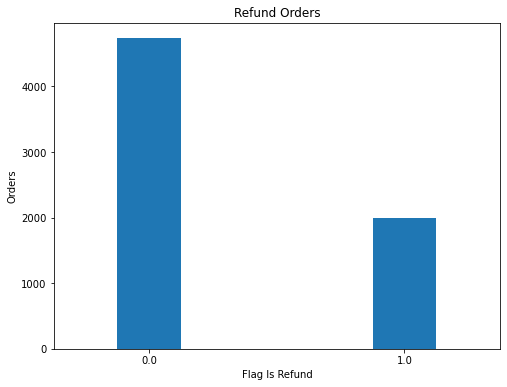

In [260]:
graa=gb1[['is_refund','ORD_ORDER_ID']]
graf=graa.set_index('is_refund')

graf.plot(kind='bar', figsize=(8, 6), rot=90, width= 0.25, legend=False)

plt.title('Refund Orders')
plt.ylabel('Orders')
plt.xlabel('Flag Is Refund')
plt.xticks(rotation=0)

plt.show()

## Items Graphics

In [191]:
ite_low.columns

Index(['CTLG_PROD_ID', 'CUS_CUST_ID_SEL', 'ITE_ITEM_ID',
       'ITE_BASE_CURRENT_PRICE', 'active_item', 'flag_bad_item',
       'flag_bad_user', 'mean', '2.25STD_Range'],
      dtype='object')

In [192]:
df_1=ite_low[['active_item','ITE_ITEM_ID']]

In [193]:
gb1=df_1.groupby(['active_item']).count()
gb1=gb1.reset_index()

gb2=gb1[['ITE_ITEM_ID']].sum()
gb1['TOTAL']=gb2['ITE_ITEM_ID']

gb1['Dis.[%]']=(gb1['ITE_ITEM_ID']/gb1['TOTAL'])*100
gb1['Dis.[%]']=gb1['Dis.[%]'].round(decimals=1)

gb1

,flag_bad_item,ITE_ITEM_ID,TOTAL,Dis.[%]
0,0,2160,2873,75.2
1,1,713,2873,24.8


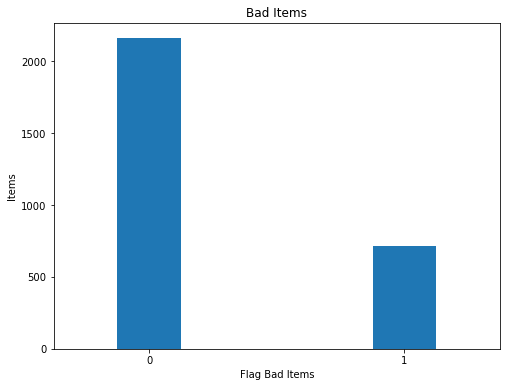

In [194]:
graa=gb1[['flag_bad_item','ITE_ITEM_ID']]
graf=graa.set_index('flag_bad_item')

graf.plot(kind='bar', figsize=(8, 6), rot=90, width= 0.25, legend=False)

plt.title('Bad Items')
plt.ylabel('Items')
plt.xlabel('Flag Bad Items')
plt.xticks(rotation=0)

plt.show()

In [195]:
df_1=ite_low[['active_item','ITE_ITEM_ID']]

In [196]:
gb1=df_1.groupby(['active_item']).count()
gb1=gb1.reset_index()

gb2=gb1[['ITE_ITEM_ID']].sum()
gb1['TOTAL']=gb2['ITE_ITEM_ID']

gb1['Dis.[%]']=(gb1['ITE_ITEM_ID']/gb1['TOTAL'])*100
gb1['Dis.[%]']=gb1['Dis.[%]'].round(decimals=1)

gb1

,active_item,ITE_ITEM_ID,TOTAL,Dis.[%]
0,0,2372,2873,82.6
1,1,501,2873,17.4


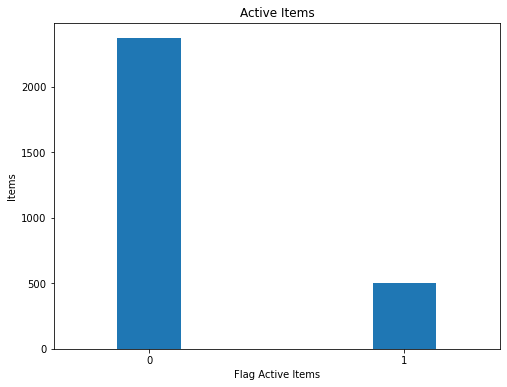

In [197]:
graa=gb1[['active_item','ITE_ITEM_ID']]
graf=graa.set_index('active_item')

graf.plot(kind='bar', figsize=(8, 6), rot=90, width= 0.25, legend=False)

plt.title('Active Items')
plt.ylabel('Items')
plt.xlabel('Flag Active Items')
plt.xticks(rotation=0)

plt.show()

In [248]:
df_1=df_f[['2.25STD_Range','ITE_ITEM_ID','active_item']]

In [249]:
gb1=df_1.groupby(['2.25STD_Range','active_item']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ITE_ITEM_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ITE_ITEM_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ITE_ITEM_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,active_item,ITE_ITEM_ID,TOTAL,Dis.[%]
0,high_STD,0,3459,7435,46.5
1,high_STD,1,3976,7435,53.5
2,low_STD,0,2372,2873,82.6
3,low_STD,1,501,2873,17.4
4,middle_STD,0,63787,103550,61.6
5,middle_STD,1,39763,103550,38.4


In [250]:
ite_ina = gb3[gb3['active_item']==0]
ite_ina

,2.25STD_Range,active_item,ITE_ITEM_ID,TOTAL,Dis.[%]
0,high_STD,0,3459,7435,46.5
2,low_STD,0,2372,2873,82.6
4,middle_STD,0,63787,103550,61.6


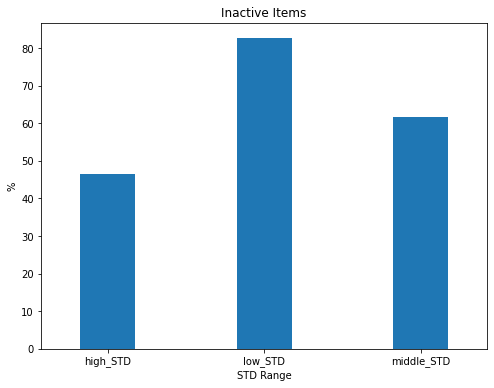

In [256]:
graa=ite_ina[['2.25STD_Range','Dis.[%]']]
graf=graa.set_index('2.25STD_Range')

graf.plot(kind='bar', figsize=(8, 6), rot=90, width= 0.35, legend=False)

plt.title('Inactive Items')
plt.ylabel('%')
plt.xlabel('STD Range')
plt.xticks(rotation=0)

plt.show()

In [244]:
df_1=df_f[['2.25STD_Range','ITE_ITEM_ID','flag_bad_item']]

In [245]:
gb1=df_1.groupby(['2.25STD_Range','flag_bad_item']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ITE_ITEM_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ITE_ITEM_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ITE_ITEM_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,flag_bad_item,ITE_ITEM_ID,TOTAL,Dis.[%]
0,high_STD,0,7121,7435,95.8
1,high_STD,1,314,7435,4.2
2,low_STD,0,2160,2873,75.2
3,low_STD,1,713,2873,24.8
4,middle_STD,0,96643,103550,93.3
5,middle_STD,1,6907,103550,6.7


In [246]:
ite_ina = gb3[gb3['flag_bad_item']==1]
ite_ina

,2.25STD_Range,flag_bad_item,ITE_ITEM_ID,TOTAL,Dis.[%]
1,high_STD,1,314,7435,4.2
3,low_STD,1,713,2873,24.8
5,middle_STD,1,6907,103550,6.7


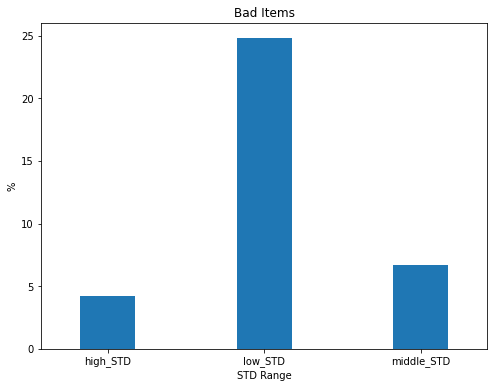

In [247]:
graa=ite_ina[['2.25STD_Range','Dis.[%]']]
graf=graa.set_index('2.25STD_Range')

graf.plot(kind='bar', figsize=(8, 6), rot=90, width= 0.35, legend=False)

plt.title('Bad Items')
plt.ylabel('%')
plt.xlabel('STD Range')
plt.xticks(rotation=0)

plt.show()

## Users Graphics

In [204]:
df_1=cus_low[['flag_bad_user','CUS_CUST_ID_SEL']]

In [205]:
gb1=df_1.groupby(['flag_bad_user']).count()
gb1=gb1.reset_index()

gb2=gb1[['CUS_CUST_ID_SEL']].sum()
gb1['TOTAL']=gb2['CUS_CUST_ID_SEL']

gb1['Dis.[%]']=(gb1['CUS_CUST_ID_SEL']/gb1['TOTAL'])*100
gb1['Dis.[%]']=gb1['Dis.[%]'].round(decimals=1)

gb1

,flag_bad_user,CUS_CUST_ID_SEL,TOTAL,Dis.[%]
0,0,1135,1196,94.9
1,1,61,1196,5.1


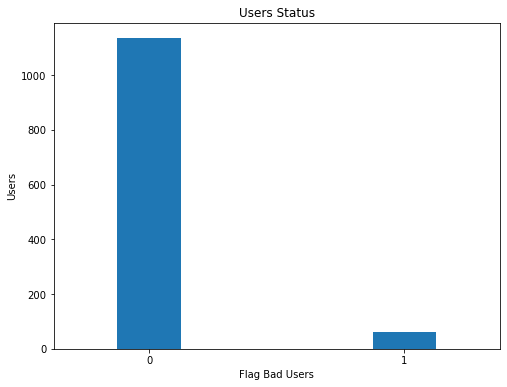

In [206]:
graa=gb1[['flag_bad_user','CUS_CUST_ID_SEL']]
graf=graa.set_index('flag_bad_user')

graf.plot(kind='bar', figsize=(8, 6), rot=90, width= 0.25, legend=False)

plt.title('Users Status')
plt.ylabel('Users')
plt.xlabel('Flag Bad Users')
plt.xticks(rotation=0)

plt.show()

In [261]:
ite_low.sample(10)

,CTLG_PROD_ID,CUS_CUST_ID_SEL,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,active_item,flag_bad_item,flag_bad_user,mean,2.25STD_Range
706921,15918090,223389656,1851799826,2.51,1,0,0,13.70,low_STD
1052137,17837279,564615359,1927762405,228.53,1,0,0,259.43,low_STD
572847,15553601,192727217,825270128,5.11,0,0,0,23.35,low_STD
941717,16596570,484436004,1702309915,85.58,1,0,0,97.27,low_STD
455421,15246346,118205728,1832265247,15.41,0,0,0,25.97,low_STD
683236,15822731,710504378,1919275861,404.00,0,1,0,528.78,low_STD
217034,9295666,582611883,1812241637,30.94,1,0,0,113.47,low_STD
20833,6072241,79273785,1927481047,8.48,0,0,0,11.44,low_STD
247157,10345749,85638021,1926095404,204.89,0,1,0,626.35,low_STD
33131,6079303,665114212,1917034457,38.64,0,0,0,58.87,low_STD


## Export the products IDs

In [112]:
#ID=df['CTLG_PROD_ID']
#ID.to_csv(r'products_id.csv', index = False)

In [113]:
#LAMBDA CON AND
#df_ratios['extremos']= df_ratios.apply(lambda x: 'caso1' if x['ratio_recla_1m']> 0.3 and x['ratio_cashout_1m']> 0.3 and x['ratio_ref_1m']> 0.3 and x['ratio_claims_1m']> 0.3 else 'no',axis=1)


In [114]:
#LAMDA CON IF ANIDADO
#df['adicionales']= df.apply(lambda x: 'caso1' if x['gmv_90d']<= 0 else('caso2' if  x['gmv_30d']<=0  else 'no'),axis=1)
